
#Identifying Flower Species using Deep Learning and PyTorch




In [1]:
#Identifying Flower Species using Deep Learning and PyTorch


In [2]:
# Deep Learning Flower Recognition

#Identifying Flower Species using Deep Learning and PyTorch
1. Pick a dataset
2. Download it
3. Import the dataset using Pytorch
4. Explore the dataset
5. Prepare dataset for training
6. Move the dataset to GPU
7. Define a neural Networks
8. Train the Model
9. Make Predictions on sample images with different networks and hyper parameters




## Downlaod the datsets

In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od
import os

In [3]:
datasets_url ="https://www.kaggle.com/alxmamaev/flowers-recognition"


In [4]:
import shutil
if os.path.exists('./flowers-recognition'):
  shutil.rmtree('./flowers-recognition')
od.download(datasets_url)  

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: srinjaykr
Your Kaggle Key: ··········


100%|██████████| 225M/225M [00:01<00:00, 149MB/s]


In [5]:
data_dir='./flowers-recognition/flowers'
import os
os.listdir(data_dir)

['rose', 'tulip', 'dandelion', 'daisy', 'sunflower']

##Import the Datasets in Pytorch


In [6]:
from torchvision.datasets import ImageFolder

In [7]:
dataset=ImageFolder(data_dir)

In [8]:
len(dataset)

4317

In [9]:
dataset[0]

(<PIL.Image.Image image mode=RGB size=320x263 at 0x7FE210A50AD0>, 0)

In [10]:
dataset.classes

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

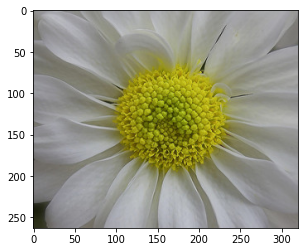

In [12]:
img, label = dataset[0]
plt.imshow(img)


In [13]:
import torchvision.transforms as tt

In [14]:
dataset=ImageFolder(data_dir,tt.Compose([tt.Resize(64),tt.RandomCrop(64),tt.ToTensor()]))

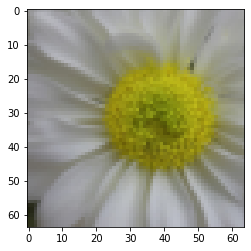

In [15]:
img,label = dataset[0]
plt.imshow(img.permute((1,2,0)))

In [16]:
val_pct=0.1
val_size=int(val_pct * len(dataset))
train_size=len(dataset) - val_size
train_size, val_size

(3886, 431)

In [17]:
from torch.utils.data import random_split
train_ds,valid_ds=random_split(dataset,[train_size,val_size])
len(train_ds) , len(valid_ds)

(3886, 431)

In [18]:
from torch.utils.data import DataLoader




batch_size=100



train_dl=DataLoader(train_ds,batch_size,shuffle=True,num_workers=4,pin_memory=True)
valid_dl=DataLoader(valid_ds,batch_size,num_workers=4,pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))




```
# This is formatted as code
```



In [19]:
from torchvision.utils import make_grid
def show_batch(dl):
  for images,labels in dl:
    fig,ax=plt.subplots(figsize=(12,6))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
    break



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


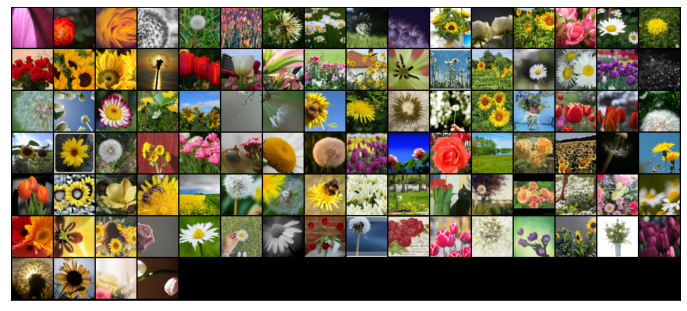

In [20]:
show_batch(train_dl)

## Utility Function & Classes

In [27]:
import torch
def get_default_device():
  if torch.cuda.is_available():
    return torch.device('cuda')
  else:
    return torch.device('cpu') 

def to_device(data,device):
  if isinstance(data,(list,tuple)):
    return [to_device(x,device) for x in data]
  return data.to(device,non_blocking=True)


class DeviceDataLoader():
  def __init__(self,dl,device):
    self.dl=dl
    self.device=device
  def __iter__(self):
    for b in self.dl:
      yield to_device(b,self.device)

  def __len__(self):
    return len(self.dl)



In [28]:
torch.cuda.is_available()

False

In [29]:
device=get_default_device()

In [30]:
device

device(type='cpu')

In [228]:
img,label=dataset[0]


In [229]:
img

tensor([[[0.6078, 0.5843, 0.5765,  ..., 0.6549, 0.6549, 0.6627],
         [0.6392, 0.6275, 0.6275,  ..., 0.6588, 0.6627, 0.6627],
         [0.6902, 0.6510, 0.6275,  ..., 0.6588, 0.6627, 0.6588],
         ...,
         [0.5137, 0.5373, 0.5529,  ..., 0.5373, 0.5412, 0.5373],
         [0.5098, 0.5294, 0.5412,  ..., 0.5176, 0.5373, 0.5490],
         [0.5059, 0.5216, 0.5373,  ..., 0.5059, 0.5176, 0.5412]],

        [[0.6118, 0.5804, 0.5765,  ..., 0.6588, 0.6588, 0.6627],
         [0.6431, 0.6235, 0.6235,  ..., 0.6588, 0.6627, 0.6627],
         [0.6941, 0.6510, 0.6275,  ..., 0.6588, 0.6627, 0.6549],
         ...,
         [0.5098, 0.5333, 0.5490,  ..., 0.5333, 0.5373, 0.5255],
         [0.5098, 0.5255, 0.5373,  ..., 0.5098, 0.5333, 0.5373],
         [0.5020, 0.5176, 0.5333,  ..., 0.5020, 0.5059, 0.5255]],

        [[0.6275, 0.5922, 0.5804,  ..., 0.6667, 0.6667, 0.6745],
         [0.6627, 0.6431, 0.6392,  ..., 0.6667, 0.6745, 0.6824],
         [0.7137, 0.6745, 0.6471,  ..., 0.6706, 0.6745, 0.

In [230]:
img.device

device(type='cpu')

In [231]:
img_gpu = to_device(img,device)
img_gpu.device

device(type='cuda', index=0)

In [232]:
train_dl=DeviceDataLoader(train_dl,device)
valid_dl=DeviceDataLoader(valid_dl,device)


##Model and Training Utilities
-Neural Networks *******

In [233]:
import torch.nn as nn
import torch.nn.functional as F

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        "calculate loss for a batch of training data"
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        "calculate loss & accuracy for a batch of validation data"
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [234]:
@torch.no_grad()
def evaluate(model, val_loader):
    """Evaluates the model's performance on the validation set"""
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [235]:
 def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        # Input: 128 x 3 x 64 x 64
        self.conv1 = conv_block(in_channels, 64) # 128 x 64 x 64 x 64
        self.conv2 = conv_block(64, 128, pool=True) # 128 x 128 x 32 x 32
        self.res1 = nn.Sequential(conv_block(128, 128), # 128 x 128 x 32 x 32
                                  conv_block(128, 128)) # 128 x 128 x 32 x 32
        
        self.conv3 = conv_block(128, 256, pool=True) # 128 x 256 x 16 x 16
        self.conv4 = conv_block(256, 512, pool=True) # 128 x 512 x 8 x 8 
        self.res2 = nn.Sequential(conv_block(512, 512), # 128 x 512 x 8 x 8 
                                  conv_block(512, 512)) # 128 x 512 x 8 x 8 
        
        self.classifier = nn.Sequential(nn.AdaptiveMaxPool2d(1), # 128 x 512 x 1 x 1 
                                        nn.Flatten(), # 128 x 512
                                        nn.Dropout(0.2),
                                        nn.Linear(512, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

In [236]:
model = to_device(ResNet9(3, len(dataset.classes)), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [237]:
model.conv1[0].weight.device

device(type='cuda', index=0)

Pass one batch of input tensor through the model
- Note-
Here in this errors may occur due to gpu computation power
-IF it happens go to the batch-size and decrease the batch size

In [238]:
for batch in train_dl:
  images,labels=batch
  print('images.shape',images.shape)
  print('images.device',images.device)
  preds=model(images)
  print('preds.shape',preds.shape)
  print(preds)
  break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


images.shape torch.Size([100, 3, 64, 64])
images.device cuda:0
preds.shape torch.Size([100, 5])
tensor([[-3.3787,  0.3484, -1.1938, -4.0426, -3.4264],
        [-1.3565,  0.7944, -0.4804, -2.0947, -2.2603],
        [-2.2210,  0.6093, -2.1887, -1.9562, -3.1699],
        [-4.4758, -3.7691, -0.8421, -7.0296, -1.6698],
        [-2.6400,  2.4171, -0.1580, -2.5758, -2.1086],
        [-2.8247,  0.5947,  1.2246, -1.7416, -3.1419],
        [-1.5342,  0.6887, -0.7091, -0.7341, -4.0662],
        [-3.8512,  0.5624, -1.4392, -3.6427, -1.5600],
        [-1.3208,  2.3303, -1.2421, -1.3513, -1.6403],
        [-0.1604,  0.6918,  0.5450, -2.2182, -1.9460],
        [-1.4527, -0.1540,  1.1576,  0.6391, -2.3363],
        [-3.0443,  3.6825,  0.3052, -4.4451, -3.7382],
        [-3.4871,  1.4271,  1.0169, -2.0161, -1.6488],
        [-0.9387,  0.8582,  0.8475, -1.8973, -4.9127],
        [-1.4186,  1.0317,  1.0112, -1.9942, -0.6860],
        [-1.1056, -0.3383, -0.9949, -2.9275, -2.5668],
        [-4.7286,  1.123

## Train the Model
- evaluate the model by calling the functions in ImageClassificationBase 
- use the fit method for finding the accuracy and oss givng the no. of times of epochs
- if the epochs in one cell geting u less accuracy try to make changes in the no. of epochs and change some training model limits by 10 factors like if 0.001 -> 0.0001 -> 0.00001 likewise it makes the epoch to leearn the model slower and steady.



In [239]:
history=[evaluate(model,valid_dl)]
history

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[{'val_acc': 0.20535483956336975, 'val_loss': 1.6086578369140625}]

In [240]:
history += fit(5, 0.001, model, train_dl, valid_dl, torch.optim.Adam)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], train_loss: 1.4043, val_loss: 1.3388, val_acc: 0.4690
Epoch [1], train_loss: 1.0141, val_loss: 0.9326, val_acc: 0.6357
Epoch [2], train_loss: 0.8720, val_loss: 1.1568, val_acc: 0.6097
Epoch [3], train_loss: 0.7725, val_loss: 0.7865, val_acc: 0.7179
Epoch [4], train_loss: 0.6929, val_loss: 0.8876, val_acc: 0.7090


In [203]:
history += fit(5, 0.001, model, train_dl, valid_dl, torch.optim.Adam)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], train_loss: 0.6171, val_loss: 0.8596, val_acc: 0.7023
Epoch [1], train_loss: 0.6022, val_loss: 0.7572, val_acc: 0.7250
Epoch [2], train_loss: 0.5331, val_loss: 0.6529, val_acc: 0.7659
Epoch [3], train_loss: 0.5067, val_loss: 0.5425, val_acc: 0.8341
Epoch [4], train_loss: 0.5012, val_loss: 0.7650, val_acc: 0.7568


In [204]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

Decrease the learning rate by 10 times -> 1/10

In [241]:
history += fit(5, 0.0001, model, train_dl, valid_dl, torch.optim.Adam)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], train_loss: 0.5623, val_loss: 0.6749, val_acc: 0.7684
Epoch [1], train_loss: 0.5026, val_loss: 0.5964, val_acc: 0.7944
Epoch [2], train_loss: 0.4644, val_loss: 0.6220, val_acc: 0.7973
Epoch [3], train_loss: 0.4339, val_loss: 0.6068, val_acc: 0.7944
Epoch [4], train_loss: 0.3974, val_loss: 0.5874, val_acc: 0.7959


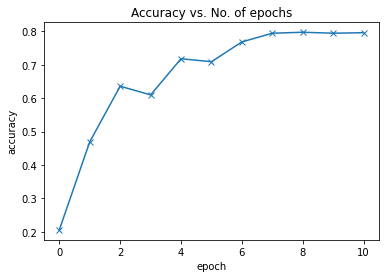

In [242]:
plot_accuracies(history)


These bumps or steep curve is due to change of epochs in differnt cell getting peak values


In [243]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

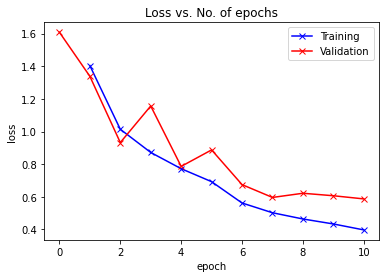

In [244]:
plot_losses(history)


##Testing with Individual Image

In [245]:
def predict_image(img, model, classes):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return classes[preds[0].item()]

In [246]:
def show_image_prediction(img, label):
    plt.imshow(img.permute((1, 2, 0)))
    pred = predict_image(img, model, dataset.classes)
    print('Target:', dataset.classes[label])
    print('Prediction:', pred)

Target: dandelion
Prediction: dandelion


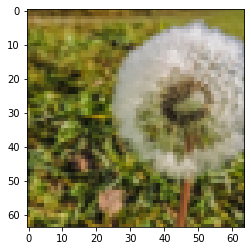

In [247]:
show_image_prediction(*valid_ds[130])


Target: rose
Prediction: rose


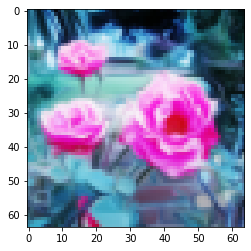

In [248]:
show_image_prediction(*valid_ds[300])


Target: daisy
Prediction: daisy


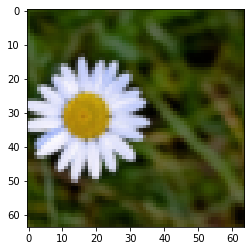

In [249]:
show_image_prediction(*valid_ds[12])


In [250]:
torch.save(model.state_dict(), 'flowers-resnet9.pth')


##Transfer Learning
-Using inbuilt networ model

In [266]:
from torchvision import models
class ResNet34(ImageClassificationBase):
  def __init__(self,num_classes,pretrained=True):
    super().__init__()
    # Use a pretrained model
    self.network=models.resnet34(pretrained=pretrained)
    #Replace last layer
    self.network.fc=nn.Linear(self.network.fc.in_features,num_classes)

    def forward(self,xb):
      return self.network(xb)

In [267]:
model=to_device(ResNet34(len(dataset.classes),pretrained=True),device)

In [268]:
#ResNet34 Model in built model
model


ResNet34(
  (network): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_ru

In [270]:
import torchvision.transforms as tt
img_size=224
imagenet_stats=([0.485,0.456,0.406],[0.229,0.224,0.225])
dataset=ImageFolder(data_dir,tt.Compose([tt.Resize(img_size),tt.RandomCrop(img_size),tt.ToTensor(),tt.Normalize(*imagenet_stats)]))


In [271]:
from torch.utils.data import random_split
from torch.utils.data import DataLoader

train_ds,valid_ds=random_split(dataset,[train_size,val_size])
#len(train_ds) , len(valid_ds)
batch_size=64
train_dl=DataLoader(train_ds,batch_size,shuffle=True,num_workers=4,pin_memory=True)
valid_dl=DataLoader(valid_ds,batch_size,num_workers=4,pin_memory=True)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [277]:
train_dl=DeviceDataLoader(train_dl,device)
valid_dl=DeviceDataLoader(valid_dl,device)

In [280]:
import torch
from tqdm.notebook import tqdm

@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader,
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []

    # Set up custom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs,
                                                steps_per_epoch=len(train_loader))

    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        lrs = []
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()

            # Gradient clipping
            if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)

            optimizer.step()
            optimizer.zero_grad()

            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()

        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history